In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# config

In [2]:
WORD_LIST = ["god", "jesus", "queen", "king", "woman", "man", "river", "tree", "horse"]

# load vectors

In [3]:
def load_vectors(path_list):
    vector_dict_list = []
    for path in path_list:
        with open(path, "rb") as f:
            vector_dict_list.append(pickle.load(f))
    return vector_dict_list

vf, vg, vw = load_vectors(["/veld/input/fasttext/m1.pkl", "/veld/input/glove/m1.pkl", "/veld/input/word2vec/m1.pkl"])
print("len(vf):", len(vf))
print("len(vg):", len(vg))
print("len(vw):", len(vw))

len(vf): 5278
len(vg): 5278
len(vw): 5277


# check similarities

In [4]:
def get_cosine_similarity_of_vectors(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [5]:
def compare_words(vector_dict):
    for i1, w1 in enumerate(WORD_LIST):
        for w2 in WORD_LIST[i1:]:
            print(w1, w2, get_cosine_similarity_of_vectors(vector_dict[w1], vector_dict[w2]))

print("- fasttext ------------------------------")
compare_words(vf)
print("- glove ---------------------------------")
compare_words(vg)
print("- word2vec ------------------------------")
compare_words(vw)

- fasttext ------------------------------
god god 1.0
god jesus 0.34739366
god queen 0.047736876
god king 0.2189309
god woman 0.08611591
god man 0.24414787
god river 0.07448217
god tree 0.09574036
god horse 0.084398694
jesus jesus 1.0000001
jesus queen 0.12166639
jesus king 0.03679195
jesus woman 0.117207244
jesus man 0.15258814
jesus river 0.05751037
jesus tree 0.11157995
jesus horse 0.03294256
queen queen 1.0
queen king 0.37470806
queen woman 0.08882632
queen man 0.04694849
queen river 0.07338754
queen tree 0.13113981
queen horse 0.051096536
king king 1.0
king woman 0.050141394
king man 0.18079416
king river 0.18099613
king tree 0.083052814
king horse 0.21481298
woman woman 0.9999999
woman man 0.30762926
woman river 0.034748904
woman tree 0.122286595
woman horse 0.12631294
man man 0.99999994
man river 0.05210742
man tree 0.1648037
man horse 0.14642808
river river 0.9999999
river tree 0.09745349
river horse 0.08548599
tree tree 1.0000001
tree horse 0.089733526
horse horse 1.0
- glove 

# t-SNE plot

In [6]:
def show_plot_t_sne(vector_dict, title):

    # get labels and values
    labels = []
    values = []
    for w in WORD_LIST:
        labels.append(w)
        values.append(vector_dict[w])
    values = np.array(values)
    
    # reduce t-SNE
    tsne = TSNE(n_components=2, perplexity=1, random_state=42)
    reduced_vectors_tsne = tsne.fit_transform(values)
    
    # Plot the reduced vectors
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_vectors_tsne[:, 0], reduced_vectors_tsne[:, 1], c='green', alpha=0.7)
    
    # Add labels
    for i, label in enumerate(labels):
        plt.text(
            reduced_vectors_tsne[i, 0], 
            reduced_vectors_tsne[i, 1], 
            label,
            fontsize=9, 
            ha="right", 
            color="black"
        )

    # plot
    plt.title(title)
    plt.show()

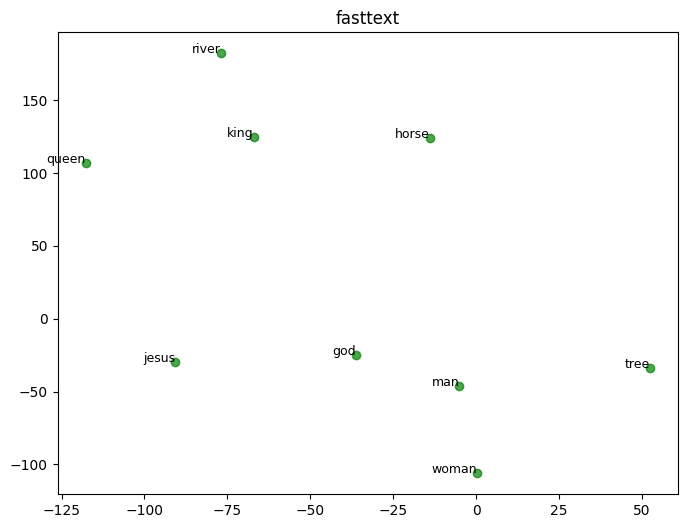

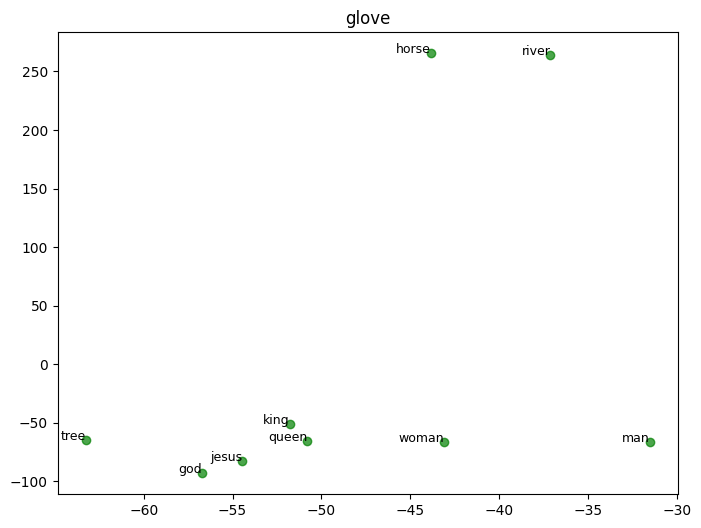

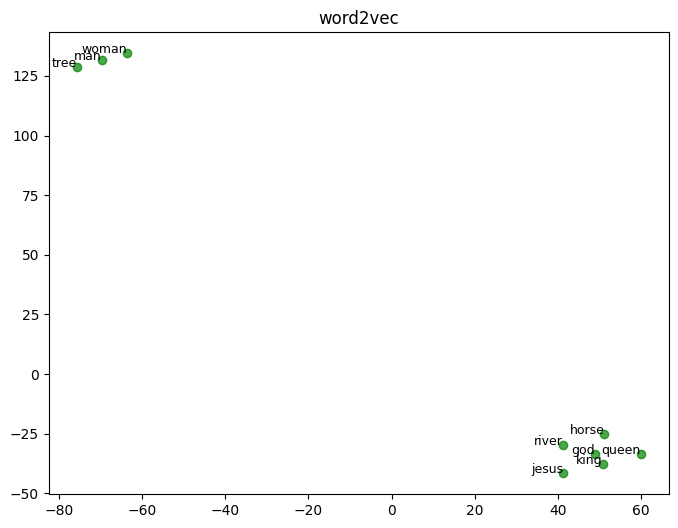

In [7]:
show_plot_t_sne(vf, "fasttext")
show_plot_t_sne(vg, "glove")
show_plot_t_sne(vw, "word2vec")

# PCA plot

In [8]:
def show_plot_pca(vector_dict, title):

    # get labels and values
    labels = []
    values = []
    for w in WORD_LIST:
        labels.append(w)
        values.append(vector_dict[w])
    values = np.array(values)
    
    # reduce
    pca = PCA(n_components=2)
    reduced_vectors_pca = pca.fit_transform(values)
    
    # Plot the reduced vectors
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_vectors_pca[:, 0], reduced_vectors_pca[:, 1], c='blue', alpha=0.7)

    # Add labels
    for i, label in enumerate(labels):
        plt.text(
            reduced_vectors_pca[i, 0], 
            reduced_vectors_pca[i, 1], 
            label,
            fontsize=9, 
            ha="right", 
            color="black"
        )
        
    # plot
    plt.title(title)
    plt.show()

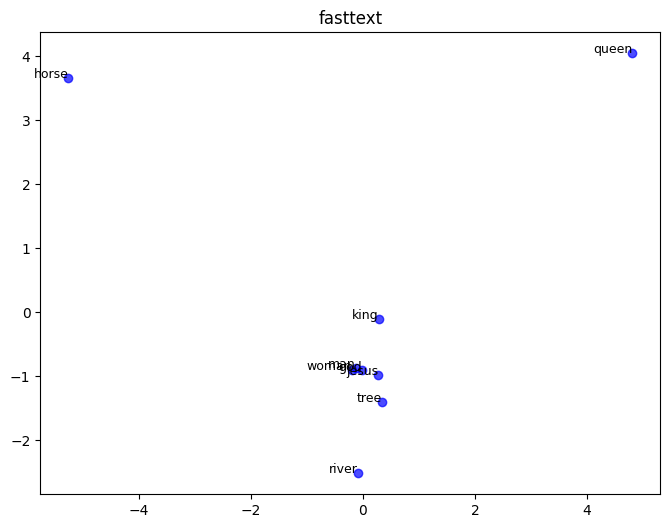

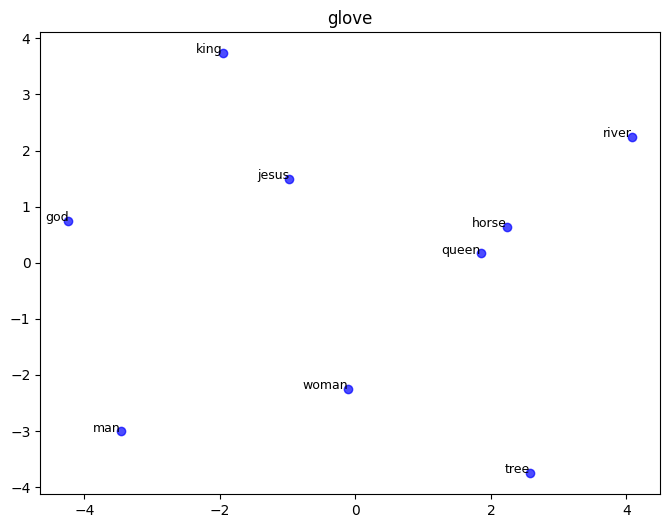

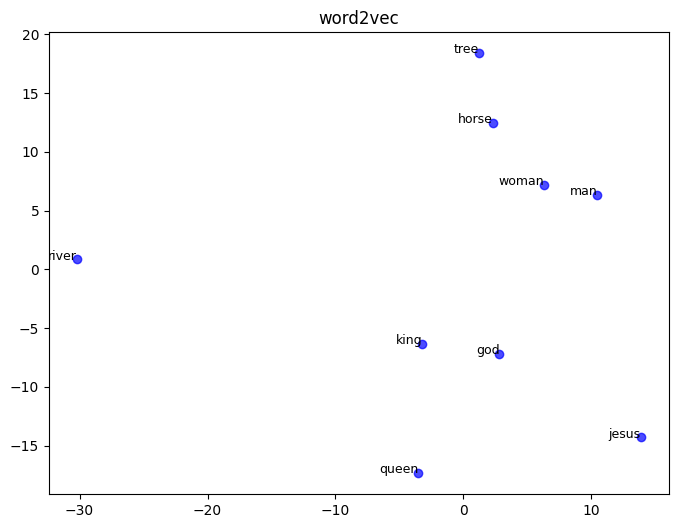

In [9]:
show_plot_pca(vf, "fasttext")
show_plot_pca(vg, "glove")
show_plot_pca(vw, "word2vec")